In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import urllib.request
import datetime
import csv
import os
now = datetime.datetime.now()
today = now.strftime("%Y-%m-%d")
today

'2018-03-07'

In [2]:
def get_data(date):
    user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36'
    headers={'User-Agent':user_agent,} 
    url = 'https://api.coindesk.com/v1/bpi/historical/close.json?start=2011-01-01&end=' + date
    request=urllib.request.Request(url,None,headers)
    obj = urllib.request.urlopen(request)
    data = json.loads(obj.read().decode('utf-8'))
    series = []
    for k,v in data['bpi'].items():
        series.append([k,v])

    series.sort()
    return series

series = get_data(today)


In [8]:

path ="C:\\Users\Shijie Wang\\Desktop\\Data Scientist"
filename = os.path.join(path,'Historical Price.csv')
with open(filename, "w",newline='') as f:
    writer = csv.writer(f)
    writer.writerows(series)


In [18]:
from pathlib import Path
import json
import urllib.request
import datetime
import csv
import os


def get_data(date):
    user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36'
    headers={'User-Agent':user_agent,} 
    url = 'https://api.coindesk.com/v1/bpi/historical/close.json?start=2011-01-01&end=' + date
    request=urllib.request.Request(url,None,headers)
    obj = urllib.request.urlopen(request)
    data = json.loads(obj.read().decode('utf-8'))
    series = []
    for k,v in data['bpi'].items():
        series.append([k,v])

    series.sort()
    return series

def daily_data():
    path ="C:\\Users\Shijie Wang\\Desktop\\Data Scientist"
    filename = os.path.join(path,'Historical Price.csv')
    my_file = Path(filename)
    if my_file.is_file() == False:
        now = datetime.datetime.now()
        today = now.strftime("%Y-%m-%d") 
        series = get_data(today)
        with open(filename, "w",newline='') as f:
            writer = csv.writer(f)
            writer.writerows(series)
    else:
        user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36'
        headers={'User-Agent':user_agent,}
        url = 'https://api.coindesk.com/v1/bpi/currentprice.json'
        request=urllib.request.Request(url,None,headers)
        obj = urllib.request.urlopen(request)
        data = json.loads(obj.read().decode('utf-8'))
        today_date_obj = datetime.datetime.strptime(data['time']['updated'],"%b %d, %Y %H:%M:%S %Z")
        today_str = today_date_obj.strftime("%Y-%m-%d")
        today_series = [today_str,data['bpi']['USD']['rate_float']]
        with open(filename, "a") as f:
            wr = csv.writer(f)
            wr.writerow(today_series)
            f.close()
daily_data()



In [19]:
series
dt = pd.DataFrame(series,columns = ['Date','Close Price'])
dt['Date'] =  pd.to_datetime(dt['Date'])
dt


,Date,Close Price
0,2011-01-01,0.3000
1,2011-01-02,0.3000
2,2011-01-03,0.2950
3,2011-01-04,0.2990
4,2011-01-05,0.2990
5,2011-01-06,0.2980
6,2011-01-07,0.3200
7,2011-01-08,0.3229
8,2011-01-09,0.3230
9,2011-01-10,0.3266


#  We could use the basic plot function, but it doesn't look so pretty. We want to examine piecewise trend due to the volatility of price trend

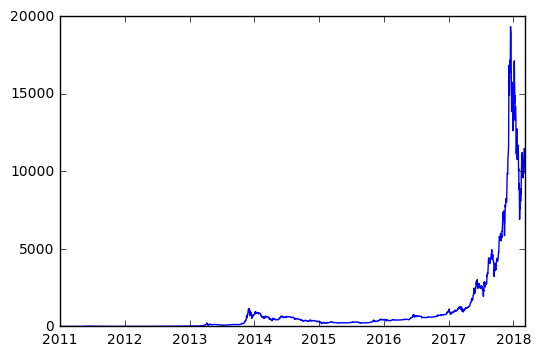

,Date,Close Price
0,2011-01-01,0.3000
1,2011-01-02,0.3000
2,2011-01-03,0.2950
3,2011-01-04,0.2990
4,2011-01-05,0.2990
5,2011-01-06,0.2980
6,2011-01-07,0.3200
7,2011-01-08,0.3229
8,2011-01-09,0.3230
9,2011-01-10,0.3266


In [7]:

plt.plot(dt['Date'],dt['Close Price'])
plt.show()
dt

In [8]:
# test
import plotly.plotly as py
import plotly.tools as tool
import plotly.graph_objs as go
price_idx = go.Scatter(
    x=dt.Date,
    y=dt['Close Price'],
    name = "Close Price",
    line = dict(color = '#17BECF'),
    opacity = 0.8)
data = [price_idx]

layout= dict(
    title = "Bitcoin Price with Slider for Inspection",
    xaxis = dict(
        rangeselector = dict(
            buttons = list([
                    dict(count = 3,
                        label = '3m',
                        step = 'month',
                        stepmode = 'backward'),
                    dict(count = 6,
                        label = '6m',
                        step = 'month',
                        stepmode = 'backward'),
                    dict(count = 12,
                        label = '12m',
                        step = 'month',
                        stepmode= 'backward'),
                    dict(count=2,
                        label = '2y',
                        step = 'year',
                        stepmode = 'backward'),
                    dict(count = 3,
                        label = '3y',
                        step = 'year',
                        stepmode = 'backward'),
                    dict(count = 5,
                        label = '5y',
                        step = 'year',
                        stepmode = 'backward'),
                    dict(step='all')
                ])
            ),
            rangeslider = dict(),
            type = 'date'
        
        )
    )
fig = dict(data = data, layout = layout)
tool.set_credentials_file(username='schwarzsakura', api_key='hGlwMTWkd2MWAuYdnoZK')
py.iplot(fig, filename = "Bitcoin Price with Slider for Inspection")

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~schwarzsakura/0 or inside your plot.ly account where it is named 'Bitcoin Price with Slider for Inspection'


# ARIMA: Test for structural breakpoint

There is no python package for structural breakpoint test and similar function as auto.arima yet. We install rpy2 which creates a framework that can translate Python objects into R objects and create R outputs. 

## rpy2 installation guide: 
1. Download precomplied binary package at https://www.lfd.uci.edu/~gohlke/pythonlibs/#rpy2 based on your python version
2. Run ```python pip install \Location\rpy2‑2.8.6‑cp35‑cp35m‑win_amd64.whl``` 
3. Setting PATH variables for R_HOME and R_USER
```python
import os
os.environ['R_HOME'] ='c:\program files\r\r-3.4.3' #where R is insatlled 
os.environ['R_USER'] = #path where your package rpy2 is installed. You can search rpy2 and open the file location. Also, add RStudio as a user C:\Users\Shijie Wang\Anaconda3\Lib\site-packages\rpy2;C:\Program Files\RStudio\bin
```
4. Intall any package you need by using ```python utils``` in  ```python imprort r``` 
```python 
from rpy2.robjects.packages import importr
utils = importr('utils')
utils.install_packages('MASS')
```

In [76]:
#import rpy2.tests
#import unittest


import os

import rpy2.robjects as robjects
import rpy2.tests
import unittest
from rpy2.robjects.packages import importr
# import R's "base" package
base = importr('base')

# import R's "utils" package
utils = importr('utils')

struc = importr('strucchange')
pi = robjects.r['pi']
pi[0]


3.1415926535897931

In [28]:
from rpy2.robjects import r,pandas2ri
pandas2ri.activate()

r = robjects.r

#dt = dt[dt['Date'] > '2017-01-01']

dt['tt'] = list(range(1,len(dt)+1))


fmla = robjects.Formula('Close.Price ~ tt')
env = fmla.environment
env['Close.Price'] = dt['Close Price']
env['tt'] = dt['tt']
stats = importr('stats')

lm_basic = stats.lm(fmla)

print(base.summary(lm_basic))
type(lm_basic)



Call:

(function (formula, data, subset, weights, na.action, method = "qr", 

    model = TRUE, x = FALSE, y = FALSE, qr = TRUE, singular.ok = TRUE, 

    contrasts = NULL, offset, ...) 

{

    ret.x <- x

    ret.y <- y

    cl <- match.call()

    mf <- match.call(expand.dots = FALSE)

    m <- match(c("formula", "data", "subset", "weights", "na.action", 

        "offset"), names(mf), 0L)

    mf <- mf[c(1L, m)]

    mf$drop.unused.levels <- TRUE

    mf[[1L]] <- quote(stats::model.frame)

    mf <- eval(mf, parent.frame())

    if (method == "model.frame") 

        return(mf)

    else if (method != "qr") 

        warning(gettextf("method = '%s' is not supported. Using 'qr'", 

            method), domain = NA)

    mt <- attr(mf, "terms")

    y <- model.response(mf, "numeric")

    w <- as.vector(model.weights(mf))

    if (!is.null(w) && !is.numeric(w)) 

        stop("'weights' must be a numeric vector")

    offset <- as.vector(model.offset(mf))

    if (!is.null(offset))

rpy2.robjects.vectors.ListVector

In [166]:
d1 = dt.loc[dt['Date'] == '2017-09-14']['tt']
d2 = dt.loc[dt['Date'] == '2017-12-16']['tt']
d3 = dt.loc[dt['Date'] == '2018-02-05']['tt']

In [96]:
seg = importr('segmented')
seg_m = seg.segmented(lm_basic)
#print(base.summary(seg_m))

print(seg_m.names)
print(seg.slope(seg_m))
print(seg_m.rx2("psi"))
dt.iloc[2339,0]
#If not specifcing psi starting point, giving only 1 breakpoint

 [1] "coefficients"  "residuals"     "effects"       "rank"         

 [5] "fitted.values" "assign"        "qr"            "df.residual"  

 [9] "xlevels"       "call"          "terms"         "model"        

[13] "rangeZ"        "psi.history"   "psi"           "it"           

[17] "epsilon"       "nameUV"        "id.group"      "id.psi.group" 

[21] "id.warn"       "orig.call"     "seed"         

$tt

           Est. St.Err. t value CI(95%).l CI(95%).u

slope1  0.40236 0.02692  14.947   0.34958   0.45515

slope2 44.69800 0.64006  69.835  43.44300  45.95300



        Initial     Est.   St.Err

psi1.tt    1312 2340.435 2.500366



Timestamp('2017-05-28 00:00:00')

## When using segmented function, an estimate of the starting point for breakpoints needs to be supplied. Increasing breakpoints will increase model parameters. Hence, BIC could be used for the best breakpoints selection. 

In this example, we can easily judge the breakpoints by visual inspection. For general prediction, below algorithm could be implemented: 
1. Apply k folds validation on the time series. Note that it's slightly different from the pooled data because it's continuous and whatever happened in year 1 and 2 could possibly affect years after. So the training will be done like this: 
    1. Train year 1 -> Test year 2
    2. Train year 1 and 2 -> Test year 3 
    ...
    7. Train year 1 to 7 -> Test year 8
2. Feed all possible combinations of breakpoints and get corresponding model's average BIC for each of the K fold traning  
3. Choose the model given the highest BIC

In [167]:
#brk = struc.breakpoints()
print(base.summary(lm_basic))
type(lm_basic)
psi_v = robjects.IntVector([d1,d2,d3])
seg_m = seg.segmented(lm_basic, psi = psi_v)
#print(base.summary(seg_m))

print(seg_m.names)
print(seg.slope(seg_m))
print(seg_m.rx2("psi"))
print(dt.iloc[2421],dt.iloc[2563],dt.iloc[2592])



Call:

(function (formula, data, subset, weights, na.action, method = "qr", 

    model = TRUE, x = FALSE, y = FALSE, qr = TRUE, singular.ok = TRUE, 

    contrasts = NULL, offset, ...) 

{

    ret.x <- x

    ret.y <- y

    cl <- match.call()

    mf <- match.call(expand.dots = FALSE)

    m <- match(c("formula", "data", "subset", "weights", "na.action", 

        "offset"), names(mf), 0L)

    mf <- mf[c(1L, m)]

    mf$drop.unused.levels <- TRUE

    mf[[1L]] <- quote(stats::model.frame)

    mf <- eval(mf, parent.frame())

    if (method == "model.frame") 

        return(mf)

    else if (method != "qr") 

        warning(gettextf("method = '%s' is not supported. Using 'qr'", 

            method), domain = NA)

    mt <- attr(mf, "terms")

    y <- model.response(mf, "numeric")

    w <- as.vector(model.weights(mf))

    if (!is.null(w) && !is.numeric(w)) 

        stop("'weights' must be a numeric vector")

    offset <- as.vector(model.offset(mf))

    if (!is.null(offset))

In [168]:
print(seg.slope(seg_m)[0],seg_m.rx2("psi") )

             Est.   St.Err.  t value  CI(95%).l CI(95%).u

slope1    0.56966  0.019097  29.8300    0.53221    0.6071

slope2  100.87000  1.390700  72.5310   98.14500  103.6000

slope3 -225.69000 13.878000 -16.2630 -252.90000 -198.4800

slope4  102.14000 13.878000   7.3602   74.93100  129.3600
         Initial     Est.    St.Err

psi1.tt    2449 2424.273 1.1468275

psi2.tt    2542 2563.197 0.8211428

psi3.tt    2593 2593.131 1.0370020



In [169]:
breaks = [dt.iloc[i,0] if i == 0 else dt.iloc[int(seg_m.rx2("psi").rx(i,2)[0]),0] for i in range(4)]
slopes = [seg.slope(seg_m)[0].rx(i+1,1)[0] for i in range(4)]

print(breaks)
print(slopes)

[Timestamp('2011-01-01 00:00:00'), Timestamp('2017-08-21 00:00:00'), Timestamp('2018-01-07 00:00:00'), Timestamp('2018-02-06 00:00:00')]
[0.56966, 100.87, -225.69, 102.14]


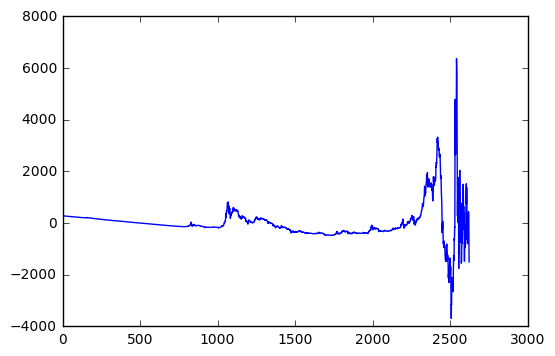

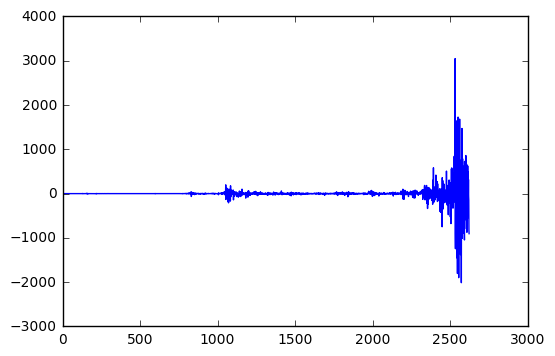

In [176]:
res = [seg_m.rx2("residuals")[i] for i in range(len(seg_m.rx2("residuals")))]
plt.plot(res)
plt.show()

secnd_diff = pd.Series(res).diff()
plt.plot(secnd_diff)
plt.show()

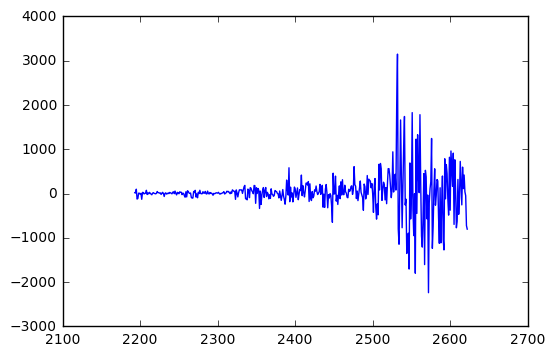

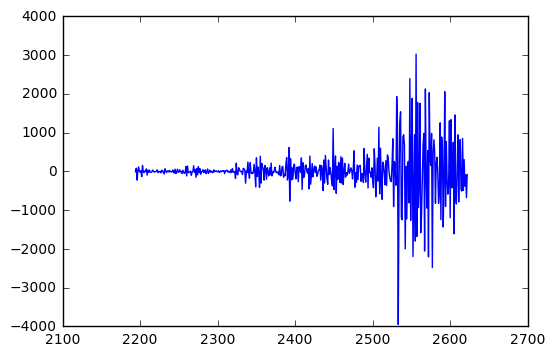

In [180]:
pd_17 = dt[dt['Date'] >='2017-01-01']
first_dif_17 = pd_17['Close Price'].diff()
second_dif_17 = pd_17['Close Price'].diff().diff()
plt.plot(first_dif_17)
plt.show()
plt.plot(second_dif_17)
plt.show()

#OK.. Use GARCH model. 

In [156]:
len(seg_m.rx2("residuals"))

2623